# Практика 2.


## CNN

Сonvolutional neural network (CNN, ConvNet), или Сверточная нейронная сеть — класс глубоких нейронных сетей, часто применяемый в анализе визуальных образов. Сверточные нейронные сети являются разновидностью многослойного перспептрона с использованием операций свёртки. Они нашли применение в распознавании изображений и видео, рекомендательных системах, классификации изображений, NLP (natural language processing) и анализе временных рядов.

Сверточные нейронные сети обеспечивают частичную устойчивость к изменениям масштаба, смещениям, поворотам, смене ракурса и прочим искажениям. Сверточные нейронные сети объединяют три архитектурных идеи, для обеспечения инвариантности к изменению масштаба, повороту сдвигу и пространственным искажениям:

- локальные рецепторные поля (обеспечивают локальную двумерную связность нейронов);
- общие синаптические коэффициенты (обеспечивают детектирование некоторых черт в любом месте изображения и уменьшают общее число весовых коэффициентов);
- иерархическая организация с пространственными подвыборками.

#Принцип работы операции свертки

Операцию свёртки можно представить следующим алгоритмом:

Скользящее окно, называемое фильтром, с размером (n,n) двигается по входному признаку. Количество движений определяется заданным количеством фильтров.
Каждый полученный шаблон имеет форму (n,n,d), где d — глубина входного признака.
Каждый шаблон умножается на своё ядро свёртки, в результате, формируется выходная карта признаков. Полученная выходная карта признаков имеет форму (`h`,`w`,`N`), где `h` и `w` — длина и ширина, полученные в результате отсечения, а `N` — количество фильтров.
Количество фильтров — гиперпараметр, поэтому выбирается самостоятельно. Обычно его подбирают как степень двойки с увеличением количества фильтров по мере увеличения глубины архитектуры. А ядра свёртки являются обучаемыми параметрами.

![Принцип действия операция свёртки](https://python-school.ru/wp-content/uploads/2020/11/2020-11-04_17-03-1.png)

Слой свёртки (англ. convolutional layer) — это основной блок свёрточной нейронной сети. Слой свёртки включает в себя для каждого канала свой фильтр, ядро свёртки которого обрабатывает предыдущий слой по фрагментам (суммируя результаты поэлементного произведения для каждого фрагмента). Весовые коэффициенты ядра свёртки (небольшой матрицы) неизвестны и устанавливаются в процессе обучения.

Особенностью свёрточного слоя является сравнительно небольшое количество параметров, устанавливаемое при обучении. Так например, если исходное изображение имеет размерность 100×100 пикселей по трём каналам (это значит 30 000 входных нейронов), а свёрточный слой использует фильтры c ядром 3×3 пикселя с выходом на 6 каналов, тогда в процессе обучения определяется только 9 весов ядра, однако по всем сочетаниям каналов, то есть 9×3×6=162, в таком случае данный слой требует нахождения только 162 параметров, что существенно меньше количества искомых параметров полносвязной нейронной сети.

Рассмотрим процесс свёртки на примере изображения в оттенках серого с размером (28,28). Глубина изображения в оттенках серого равна 1, если бы это было RGB, то глубина входа равнялась бы 3. Пусть размер фильтра равняется (3,3), а всего их 32.
1. На первом этапе сформируются 32 шаблона размером (3,3,1), где 1 — глубина изображения.
2. Полученные шаблоны умножаются на ядра свертки. Каждый преобразованный в результате умножения шаблон формирует вектор с длиной равной количеству фильтров, т.е. 32.
3. Все преобразованные шаблоны объединяются в выходную карту признаков. Она имеет размер (26,26,32)

![Текст ссылки](https://habrastorage.org/webt/o0/zh/rz/o0zhrzr_ml2tgsfmvl-mcrxjmbq.gif)

# Слой пулинга
Слой пулинга (иначе подвыборки, субдискретизации) представляет собой нелинейное уплотнение карты признаков, при этом группа пикселей (обычно размера 2×2) уплотняется до одного пикселя, проходя нелинейное преобразование. Наиболее употребительна при этом функция максимума. Преобразования затрагивают непересекающиеся прямоугольники или квадраты, каждый из которых ужимается в один пиксель, при этом выбирается пиксель, имеющий максимальное значение. 
Пулинговый слой призван снижать размерность изображения. Исходное изображение делится на блоки размером `w × h` и для каждого блока вычисляется некоторая функция. Чаще всего используется функция максимума (англ. max pooling) или (взвешенного) среднего (англ. (weighted) average pooling). Обучаемых параметров у этого слоя нет.
Пулинг интерпретируется так: если на предыдущей операции свёртки уже были выявлены некоторые признаки, то для дальнейшей обработки настолько подробное изображение уже не нужно, и оно уплотняется до менее подробного. К тому же фильтрация уже ненужных деталей помогает не переобучаться. Слой пулинга, как правило, вставляется после слоя свёртки перед слоем следующей свёртки.

Кроме пулинга с функцией максимума можно использовать и другие функции — например, среднего значения или L2-нормирования. Однако практика показала преимущества именно пулинга с функцией максимума, который включается в типовые системы.


Основные цели пулингового слоя:
- уменьшение изображения, чтобы последующие свертки оперировали над большей областью исходного изображения;
- увеличение инвариантности выхода сети по отношению к малому переносу входа;
- ускорение вычислений.

# Выбор функции активации

Одним из этапов разработки нейронной сети является выбор функции активации нейронов. Вид функции активации во многом определяет функциональные возможности нейронной сети и метод обучения этой сети. Классический алгоритм обратного распространения ошибки хорошо работает на двухслойных и трехслойных нейронных сетях, но при дальнейшем увеличении глубины начинает испытывать проблемы. Одна из причин — так называемое затухание градиентов. По мере распространения ошибки от выходного слоя к входному на каждом слое происходит домножение текущего результата на производную функции активации. Производная у традиционной сигмоидной функции активации меньше единицы на всей области определения, поэтому после нескольких слоев ошибка станет близкой к нулю. Если же, наоборот, функция активации имеет неограниченную производную (как, например, гиперболический тангенс), то может произойти взрывное увеличение ошибки по мере распространения, что приведет к неустойчивости процедуры обучения.

![Текст ссылки](https://habrastorage.org/webt/ux/rx/mt/uxrxmtrbzdniqbytle0ps2_jhbs.png)

![Текст ссылки](https://habrastorage.org/webt/vy/id/p9/vyidp9qwfzsnwrx7pysfaw7nvig.png)

# Dropout
Для улучшения работы сети, повышения её устойчивости и предотвращения переобучения применяется также исключение（дропаут）— метод тренировки подсети с выбрасыванием случайных одиночных нейронов.

Исключение или дропаут (от англ. dropout) — метод регуляризации искусственных нейронных сетей, предназначен для уменьшения переобучения сети за счет предотвращения сложных коадаптаций отдельных нейронов на тренировочных данных во время обучения.
Термин «dropout» (выбивание, выбрасывание) характеризует исключение определённого процента (например 30%) случайных нейронов (находящихся как в скрытых, так и видимых слоях) на разных итерациях (эпохах) во время обучения нейронной сети. Это очень эффективный способ усреднения моделей внутри нейронной сети. В результате более обученные нейроны получают в сети больший вес. Такой приём значительно увеличивает скорость обучения, качество обучения на тренировочных данных, а также повышает качество предсказаний модели на новых тестовых данных.

# Примерная топология сверточной нейросети
![Текст ссылки](https://habrastorage.org/webt/tf/pb/9m/tfpb9mda5whbxqxauct4_dhnkqw.png)

# Пример

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


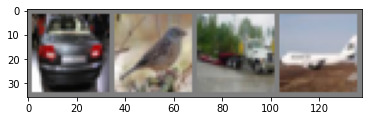

car   bird  truck plane


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# функция для показа изображения
def imshow(img):
    img = img  / 2  + 0.5    
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# получаем несколько случайных обучающих изображений
dataiter = iter(trainloader)
images, labels = next(dataiter)

# показать изображения
imshow(torchvision.utils.make_grid(images))
# показать лейблы изображений
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

# Инициализация модели
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) # (in_channels, out_channels, kernel_size) Применяет 2D-свертку к входному сигналу, состоящему из нескольких входных плоскостей.
        self.pool = nn.MaxPool2d(2, 2) # (kernel_size, stride) Применяет MaxPool2D-объединение к входному сигналу, состоящему из нескольких входных плоскостей.
        self.conv2 = nn.Conv2d(6, 16, 5) 
        self.fc1 = nn.Linear(16 * 5 * 5, 120 )# (in_features , out_features) Применяет линейное преобразование к входящим данным
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    # Это forward функция, которая определяет структуру сети.
    # Здесь мы принимаем только один вход, но можно использовать больше.
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) #(input, start_dim) Сглаживает input путем преобразования его в одномерный тензор.
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

Коэффициент скорости обучения – это гиперпараметр, определяющий порядок того, как мы будем корректировать наши весы с учётом функции потерь в градиентном спуске. Чем ниже величина, тем медленнее мы движемся по наклонной. Хотя при использовании низкого коэффициента скорости обучения мы можем получить положительный эффект в том смысле, чтобы не пропустить ни одного локального минимума, — это также может означать, что нам придётся затратить много времени на cходимость, особенно если мы попали в область плато.

Импульс (momentum) в нейронных сетях — это вариант стохастического градиентного спуска . Он заменяет градиент импульсом , который представляет собой совокупность градиентов, как очень хорошо объяснено [здесь](https://towardsdatascience.com/10-gradient-descent-optimisation-algorithms-86989510b5e9).




In [ ]:
import torch.optim as optim

#Критерии полезны для обучения нейронной сети. Учитывая входные данные и цель, они вычисляют градиент в соответствии с заданной функцией потерь
criterion = nn.CrossEntropyLoss()
#torch.optim - это пакет, реализующий различные алгоритмы оптимизации. Наиболее часто используемые методы уже поддерживаются, а интерфейс достаточно общий, так что более сложные методы могут быть также легко интегрированы в будущем.
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
for epoch in range(2):  # многократное прохождение по набору данных

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # получаем входные данные; данные - это список [inputs, labels].
        inputs, labels = data

        # обнуляем градиенты параметров
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # вывести статистику обучения
        running_loss += loss.item()
        if i % 2000 == 1999:    # вывести каждые 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.203
[1,  4000] loss: 1.829
[1,  6000] loss: 1.659
[1,  8000] loss: 1.573
[1, 10000] loss: 1.501
[1, 12000] loss: 1.477
[2,  2000] loss: 1.379
[2,  4000] loss: 1.354
[2,  6000] loss: 1.344
[2,  8000] loss: 1.327
[2, 10000] loss: 1.288
[2, 12000] loss: 1.260
Finished Training


In [ ]:
#Сохранение нашей модели
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

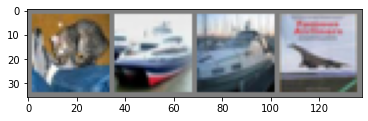

GroundTruth:  cat   ship  ship  plane


In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# вывод изображений
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [ ]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [ ]:
outputs = net(images)

In [ ]:
correct = 0
total = 0
# поскольку мы не обучаемся, нам не нужно вычислять градиенты для наших выходов
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # рассчитываем выходные данные, пропуская изображения через сеть
        outputs = net(images)
        # класс с наибольшей мощностью - это то, что мы выбираем в качестве предсказания
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 54 %


In [ ]:
# Подготовка
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # собираем правильные прогнозы для каждого класса
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# Выводим точность на каждом классе
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 46.9 %
Accuracy for class: car   is 59.5 %
Accuracy for class: bird  is 41.0 %
Accuracy for class: cat   is 29.4 %
Accuracy for class: deer  is 50.7 %
Accuracy for class: dog   is 52.6 %
Accuracy for class: frog  is 66.5 %
Accuracy for class: horse is 74.7 %
Accuracy for class: ship  is 68.1 %
Accuracy for class: truck is 57.5 %


# Задание на практику 2
1. Модифицировать архитектуру СНС в примере (показать повышение точности)
2. Обучить свой классификатор на своем датасете
3. Назвать популярые архитектуры СНС и их особенности